In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:

def plot_decision_boundary(kernel):
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    plt.figure(figsize=(15, 6))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        X = iris.data[:, pair]
        y = iris.target
        clf = SVC(kernel=kernel).fit(X, y)

        plt.subplot(2, 3, pairidx + 1)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color,
                        label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of SVM with " + kernel + " kernel using paired features")
    plt.legend(loc='lower right')
    plt.show()


In [3]:

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


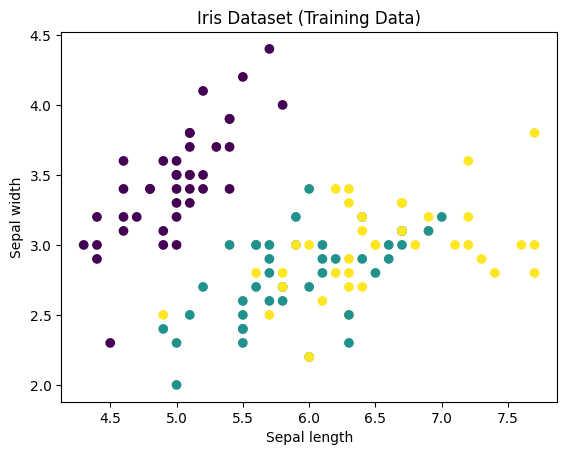

In [4]:

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Iris Dataset (Training Data)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


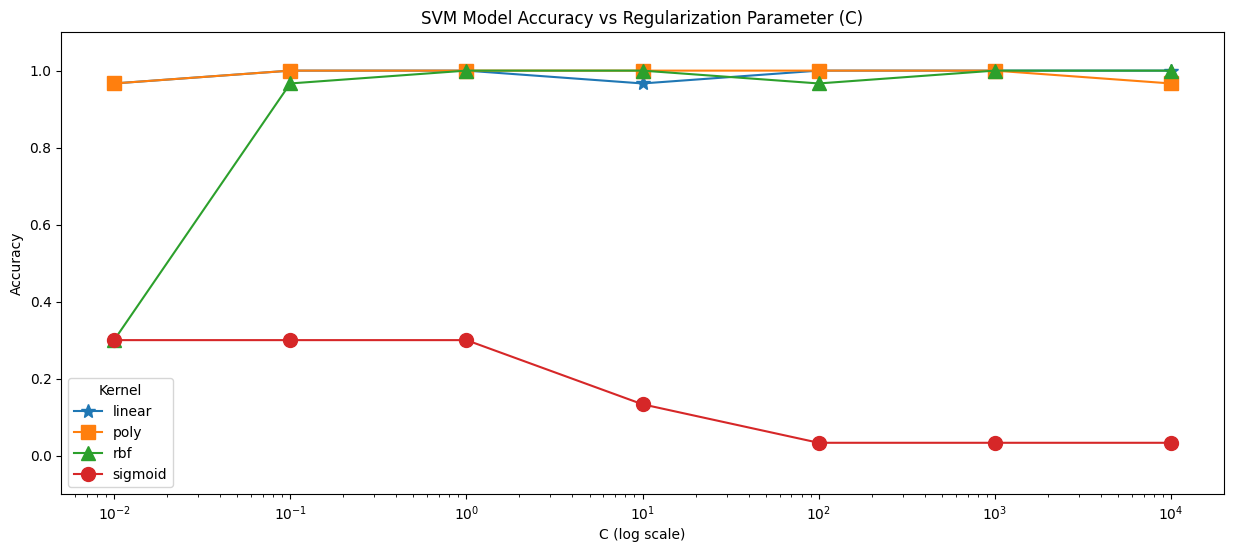

In [5]:

C_list = [10**i for i in range(-2, 5)]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
markers = ['*', 's', '^', 'o']

scores = []

for k in kernels:
    temp = []
    for C in C_list:
        model = SVC(C=C, kernel=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp.append(accuracy_score(y_test, y_pred))
    scores.append(temp)

plt.figure(figsize=(15, 6))
for i in range(len(kernels)):
    plt.plot(C_list, scores[i], label=kernels[i], marker=markers[i], markersize=10)

plt.xscale("log")
plt.ylim(-0.1, 1.1)
plt.legend(title="Kernel")
plt.title("SVM Model Accuracy vs Regularization Parameter (C)")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.show()


RBF Kernel


C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx

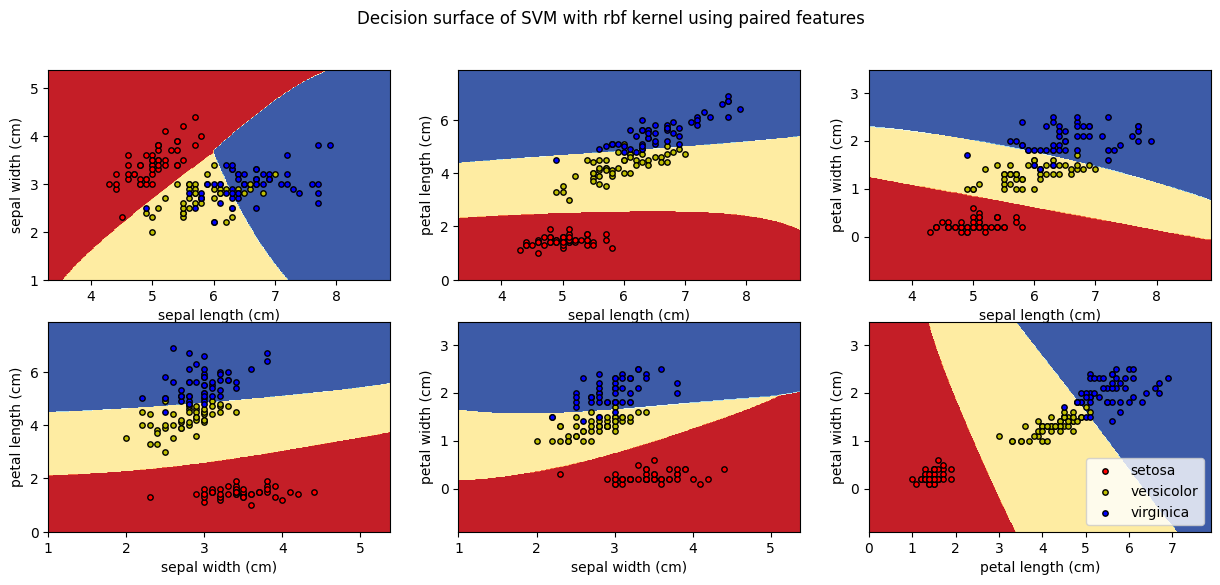

Polynomial Kernel


C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
C:\Users\manan\AppData\Local\Temp\ipykernel_12552\2570441879.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx

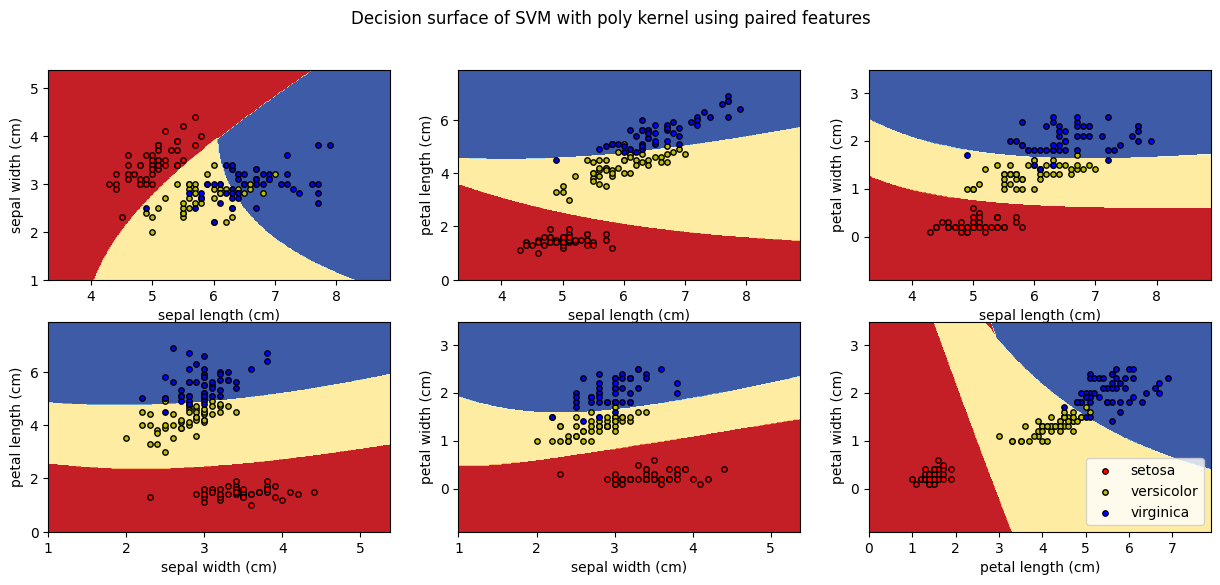

In [6]:

print('RBF Kernel')
plot_decision_boundary('rbf')

print('Polynomial Kernel')
plot_decision_boundary('poly')
